In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import acquire as ac

import warnings
warnings.filterwarnings("ignore")

# Tips

In [2]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# train/test split
train, test = train_test_split(tips, train_size=.75, random_state=56)

In [4]:
# scale numeric data
scaler = MinMaxScaler()
scaler.fit(train[["total_bill", "tip"]])
train[["total_bill", "tip"]] = scaler.transform(train[["total_bill", "tip"]])
train.head()

,total_bill,tip,sex,smoker,day,time,size
68,0.359447,0.112222,Male,No,Sat,Dinner,2
211,0.478006,0.462222,Male,Yes,Sat,Dinner,4
102,0.863636,0.166667,Female,Yes,Sat,Dinner,3
0,0.291579,0.001111,Female,No,Sun,Dinner,2
191,0.350649,0.354444,Female,Yes,Thur,Lunch,2


In [5]:
train.day.value_counts()

Sat     72
Sun     52
Thur    44
Fri     15
Name: day, dtype: int64

In [6]:
train.time.value_counts()

Dinner    134
Lunch      49
Name: time, dtype: int64

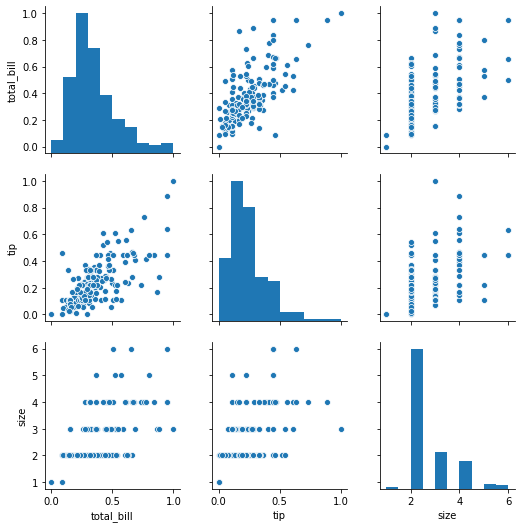

In [7]:
sns.pairplot(train)

## Hypothesis Testing
### T-Tests

$H_0$: Customers who dine on Sundays tip the same amount as the average customer

$H_a$: Customers who dine on Sundays tip a different amount as the average customer

In [8]:
alpha = .001

x = tips[(tips.day == "Sun")].tip
mu = tips.tip.mean()

t_stat, p = stats.ttest_1samp(x, mu)
print(f"t-statistic = {t_stat}")
print(f"    p-value = {p}")
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic = 1.8132863682799842
    p-value = 0.0737884052452269
Fail to reject null hypothesis


$H_0$: Customers who dine at lunch time tip the same amount as the average customer

$H_a$: Customers who dine at lunch time tip a different amount as the average customer

In [9]:
alpha = .001

x = tips[(tips.time == "Lunch")].tip
mu = tips.tip.mean()

t_stat, p = stats.ttest_1samp(x, mu)
print(f"t-statistic = {t_stat}")
print(f"    p-value = {p}")
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic = -1.8484723073745426
    p-value = 0.06894738419244793
Fail to reject null hypothesis


$H_0$: Customers who dine at on Saturdays at dinner time tip the same amount as the average customer

$H_a$: Customers who dine at on Saturdays at dinner time tip a different amount as the average customer

In [10]:
alpha = .001

x = tips[(tips.day == "Sat") & (tips.time == "Dinner")].tip
mu = tips.tip.mean()

t_stat, p = stats.ttest_1samp(x, mu)
print(f"t-statistic = {t_stat}")
print(f"    p-value = {p}")
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic = -0.029595955732503072
    p-value = 0.9764578652842097
Fail to reject null hypothesis


---
### $$\chi^2$$ 

$H_0$: Sex and smoking status are independent of each other

$H_a$: Sex and smoking status are dependent on each other

In [11]:
alpha = .001

ctab = pd.crosstab(train.sex, train.smoker)
chi2_stat, p, degf, expected = stats.chi2_contingency(ctab)

print(f"chi2-statistic = {chi2_stat}")
print(f"       p-value = {p}")
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

chi2-statistic = 0.0013603319083297476
       p-value = 0.9705785516072718
Fail to reject null hypothesis
